# Info

Kaggle

[HR Analytics: Job Change of Data Scientists](https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists)

[убрать 2-х этажный индекс из сводной таблицы](https://stackoverflow.com/questions/14507794/pandas-how-to-flatten-a-hierarchical-index-in-columns)

[дата сэт](https://drive.google.com/file/d/1Sk3k2P3jS4DHVZgkOyu2uFzEk_jyyvdH/view?usp=sharing)




# Init

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('dark_background')

In [2]:
! gdown --id 1Sk3k2P3jS4DHVZgkOyu2uFzEk_jyyvdH

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Sk3k2P3jS4DHVZgkOyu2uFzEk_jyyvdH
To: /content/hr-analytics.zip
100% 302k/302k [00:00<00:00, 130MB/s]


In [3]:
! unzip /content/hr-analytics.zip

Archive:  /content/hr-analytics.zip
  inflating: aug_test.csv            
  inflating: aug_train.csv           
  inflating: sample_submission.csv   


In [58]:
df = pd.read_csv('/content/aug_train.csv', encoding='cp1251')

# Simple

In [5]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [ ]:
df.tail(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
19148,9212,city_21,0.624,NaN,Has relevent experience,no_enrollment,Masters,STEM,3,100-500,Pvt Ltd,3,40,1.0
19149,251,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,9,50-99,Pvt Ltd,1,36,1.0
19150,32313,city_160,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,10,100-500,Public Sector,3,23,0.0
19151,11385,city_149,0.689,Male,No relevent experience,Full time course,Graduate,NaN,2,NaN,NaN,1,60,0.0
19152,29754,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,Humanities,7,10/49,Funded Startup,1,25,0.0
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0
19157,23834,city_67,0.855,NaN,No relevent experience,no_enrollment,Primary School,NaN,2,NaN,NaN,1,127,0.0


In [ ]:
df[['city', 'major_discipline']].head(5)

,city,major_discipline
0,city_103,STEM
1,city_40,STEM
2,city_21,STEM
3,city_115,Business Degree
4,city_162,STEM


In [ ]:
len(df)

19158

In [ ]:
df.drop('city', axis=1)

,enrollee_id,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [ ]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [ ]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

# Фильтрация и ворнинги

In [ ]:
df[['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target']]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [ ]:
df['new_col'] = df['city_development_index']/df['training_hours']

In [ ]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [ ]:
df.assign(new_col3 = 100)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,new_col,new_col3
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,0.025556,100
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,0.016511,100
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,0.007518,100
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,0.015173,100
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,0.095875,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0,0.020905,100
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0,0.017692,100
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0,0.020909,100
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0,0.008268,100


In [ ]:
df1 = df[(df['city'] != 'city_65') * (df['gender'] == 'Male')] # Pandas notation

In [ ]:
df1

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19149,251,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,9,50-99,Pvt Ltd,1,36,1.0
19151,11385,city_149,0.689,Male,No relevent experience,Full time course,Graduate,NaN,2,NaN,NaN,1,60,0.0
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0


In [ ]:
df2 = df.query('city =="city_65"')

In [ ]:
df2

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
95,12081,city_65,0.802,Male,Has relevent experience,Full time course,Graduate,STEM,9,50-99,Pvt Ltd,1,33,0.0
98,7016,city_65,0.802,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Pvt Ltd,2,14,1.0
198,7731,city_65,0.802,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,NaN,NaN,never,84,0.0
346,32652,city_65,0.802,Male,Has relevent experience,Full time course,Masters,STEM,5,100-500,Pvt Ltd,4,124,0.0
475,17783,city_65,0.802,Male,Has relevent experience,Full time course,Graduate,STEM,<1,10000+,Pvt Ltd,2,11,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18765,23893,city_65,0.802,Female,No relevent experience,no_enrollment,Masters,STEM,14,NaN,NaN,1,11,1.0
18771,4992,city_65,0.802,NaN,No relevent experience,Full time course,High School,NaN,7,100-500,Pvt Ltd,never,83,0.0
19100,16368,city_65,0.802,NaN,No relevent experience,no_enrollment,NaN,NaN,4,NaN,NaN,2,304,0.0
19135,20520,city_65,0.802,Male,Has relevent experience,no_enrollment,Graduate,STEM,8,50-99,Public Sector,2,136,0.0


# Прочее инфо

In [ ]:
df.isna().mean().sort_values(ascending=False)

company_type              0.320493
company_size              0.309949
gender                    0.235306
major_discipline          0.146832
education_level           0.024011
last_new_job              0.022080
enrolled_university       0.020148
experience                0.003393
enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
relevent_experience       0.000000
training_hours            0.000000
target                    0.000000
dtype: float64

<Axes: >

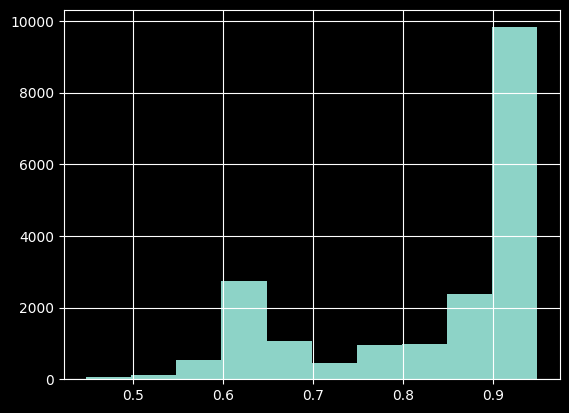

In [ ]:
df['city_development_index'].hist()

In [ ]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [ ]:
df['gender'].value_counts(dropna=False)

Male      13221
NaN        4508
Female     1238
Other       191
Name: gender, dtype: int64

In [ ]:
q1 = df['city_development_index'].quantile(0.05)
q2 = df['city_development_index'].quantile(0.95)

<Axes: >

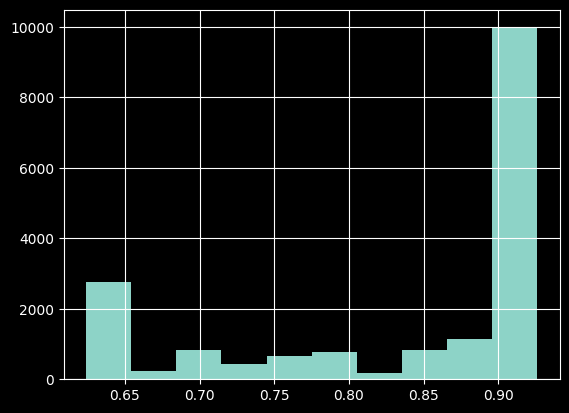

In [ ]:
df[df['city_development_index'].between(q1,q2)]['city_development_index'].hist()

# Сводные таблицы

In [ ]:
t =df.groupby('gender', dropna=False)['target'].agg(['count', 'mean'])
df.groupby('gender', dropna=False)['target'].agg(['count', 'mean'])

,count,mean
gender,,
Female,1238,0.263328
Male,13221,0.227819
Other,191,0.261780
NaN,4508,0.308119


In [ ]:
t['count'].sum()

19158

In [ ]:
df.groupby('education_level', dropna=False)['target'].agg(['count', 'mean'])

,count,mean
education_level,,
Graduate,11598,0.279790
High School,2017,0.195340
Masters,4361,0.214400
Phd,414,0.140097
Primary School,308,0.133117
NaN,460,0.226087


<Axes: xlabel='education_level'>

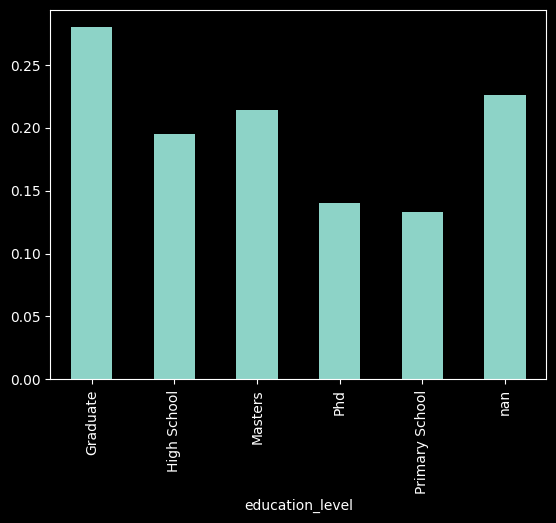

In [ ]:
df.groupby('education_level', dropna=False)['target'].mean().plot(kind='bar')

In [308]:
df['city_development_index_group'] = pd.cut(df['city_development_index'],5)

In [ ]:
df.groupby('city_development_index_group', dropna=False)['target'].agg(['count', 'mean'])

,count,mean
city_development_index_group,,
"(0.447, 0.548]",178,0.578652
"(0.548, 0.648]",3297,0.582651
"(0.648, 0.749]",1529,0.273381
"(0.749, 0.849]",1949,0.194459
"(0.849, 0.949]",12205,0.160262


In [ ]:
df['city_development_index_group_q'] = pd.qcut(df['city_development_index'],5, duplicates='drop')

In [ ]:
df.groupby('city_development_index_group_q', dropna=False)['target'].agg(['count', 'mean'])

,count,mean
city_development_index_group_q,,
"(0.447, 0.691]",3869,0.550530
"(0.691, 0.878]",3827,0.206428
"(0.878, 0.92]",8925,0.178375
"(0.92, 0.949]",2537,0.104454


In [ ]:
df.groupby('city_development_index')['target'].agg(['mean','sum'])

,mean,sum
city_development_index,,
0.448,0.647059,11.0
0.479,0.535714,15.0
0.487,0.800000,4.0
0.493,0.538462,7.0
0.512,0.600000,3.0
...,...,...
0.924,0.093023,28.0
0.925,0.140351,24.0
0.926,0.099551,133.0


In [ ]:
df.groupby(['gender','company_type'], dropna=False)['target'].agg(['mean','sum'])

mean     sum
gender company_type                         
Female Early Stage Startup  0.243902    10.0
       Funded Startup       0.108696    10.0
       NGO                  0.203704    11.0
       Other                0.333333     4.0
       Public Sector        0.195876    19.0
       Pvt Ltd              0.175258   102.0
       NaN                  0.472222   170.0
Male   Early Stage Startup  0.219638    85.0
       Funded Startup       0.137466   102.0
       NGO                  0.158960    55.0
       Other                0.189873    15.0
       Public Sector        0.201639   123.0
       Pvt Ltd              0.163436  1155.0
       NaN                  0.370175  1477.0
Other  Early Stage Startup  0.000000     0.0
       Funded Startup       0.166667     2.0
       NGO                  0.000000     0.0
       Other                1.000000     1.0
       Public Sector        0.333333     3.0
       Pvt Ltd              0.139241    11.0
       NaN                  0.397590    33.0
NaN    Early Stage Startup  0.273256    47.0
       Funded Startup       0.167742    26.0
       NGO                  0.264957    31.0
       Other                0.310345     9.0
       Public Sector        0.271967    65.0
       Pvt Ltd              0.242700   507.0
       NaN                  0.412419   704.0

In [ ]:
df['gender'].value_counts(dropna=False)

Male      13221
NaN        4508
Female     1238
Other       191
Name: gender, dtype: int64

In [ ]:
df.isna().mean().sort_values(ascending=False)

company_type              0.320493
company_size              0.309949
gender                    0.235306
major_discipline          0.146832
education_level           0.024011
last_new_job              0.022080
enrolled_university       0.020148
experience                0.003393
enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
relevent_experience       0.000000
training_hours            0.000000
target                    0.000000
dtype: float64

In [ ]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [ ]:
t1 = df.groupby(['major_discipline','enrolled_university'], dropna=False)['target'].mean

In [ ]:
import numpy as np

In [ ]:
type(df['target'].sum())

numpy.float64

In [ ]:
t2 = df.pivot_table(index=['major_discipline','enrolled_university'], sort=True,  margins=False, margins_name='All', values='target', dropna=False, aggfunc={'target': [np.mean, np.sum, np.median]})

In [ ]:
t2

mean  median     sum
major_discipline enrolled_university                          
Arts             Full time course     0.230769     0.0     3.0
                 Part time course     0.250000     0.0     3.0
                 no_enrollment        0.203540     0.0    46.0
Business Degree  Full time course     0.230769     0.0     6.0
                 Part time course     0.157895     0.0     3.0
                 no_enrollment        0.271429     0.0    76.0
Humanities       Full time course     0.348837     0.0    15.0
                 Part time course     0.259259     0.0     7.0
                 no_enrollment        0.196610     0.0   116.0
No Major         Full time course     0.526316     1.0    10.0
                 Part time course     0.230769     0.0     3.0
                 no_enrollment        0.213904     0.0    40.0
Other            Full time course     0.416667     0.0    25.0
                 Part time course     0.277778     0.0     5.0
                 no_enrollment        0.234114     0.0    70.0
STEM             Full time course     0.419847     0.0  1100.0
                 Part time course     0.258242     0.0   235.0
                 no_enrollment        0.220383     0.0  2370.0

In [ ]:
df.pivot_table( values='training_hours', index=['major_discipline','gender'],  aggfunc={'training_hours': [np.mean, np.sum, np.median]})

mean  median     sum
major_discipline gender                           
Arts             Female  57.416667    48.0    2067
                 Male    61.525000    47.5    9844
                 Other   66.571429    96.0     466
Business Degree  Female  69.200000    40.0    1730
                 Male    68.601770    49.0   15504
                 Other   66.333333    48.0     199
Humanities       Female  62.313559    46.5    7353
                 Male    65.787879    47.0   28223
                 Other   29.375000    25.5     235
No Major         Female  47.250000    39.5     756
                 Male    64.883436    46.0   10576
                 Other   68.666667    56.0     206
Other            Female  65.472222    53.0    2357
                 Male    67.230769    50.0   16606
                 Other   31.857143    24.0     223
STEM             Female  67.010776    51.0   62186
                 Male    64.836175    47.0  657763
                 Other   65.286957    48.0    7508

In [11]:
df.pivot_table(index='major_discipline', values='training_hours', aggfunc={'training_hours': [np.mean, np.min, np.sum, np.median, np.count_nonzero, lambda x: np.percentile(x, 25)]})

,<lambda_0>,amin,count_nonzero,mean,median,sum
major_discipline,,,,,,
Arts,25.0,2,253,60.272727,47.0,15249
Business Degree,25.0,1,327,66.189602,47.0,21644
Humanities,23.0,2,669,65.635277,47.0,43910
No Major,22.5,2,223,62.941704,46.0,14036
Other,23.0,1,381,66.049869,48.0,25165
STEM,23.0,1,14492,65.206390,47.0,944971


In [46]:
q1 = df['city_development_index'].quantile(0.05)
q2 = df['city_development_index'].quantile(0.95)

<Axes: >

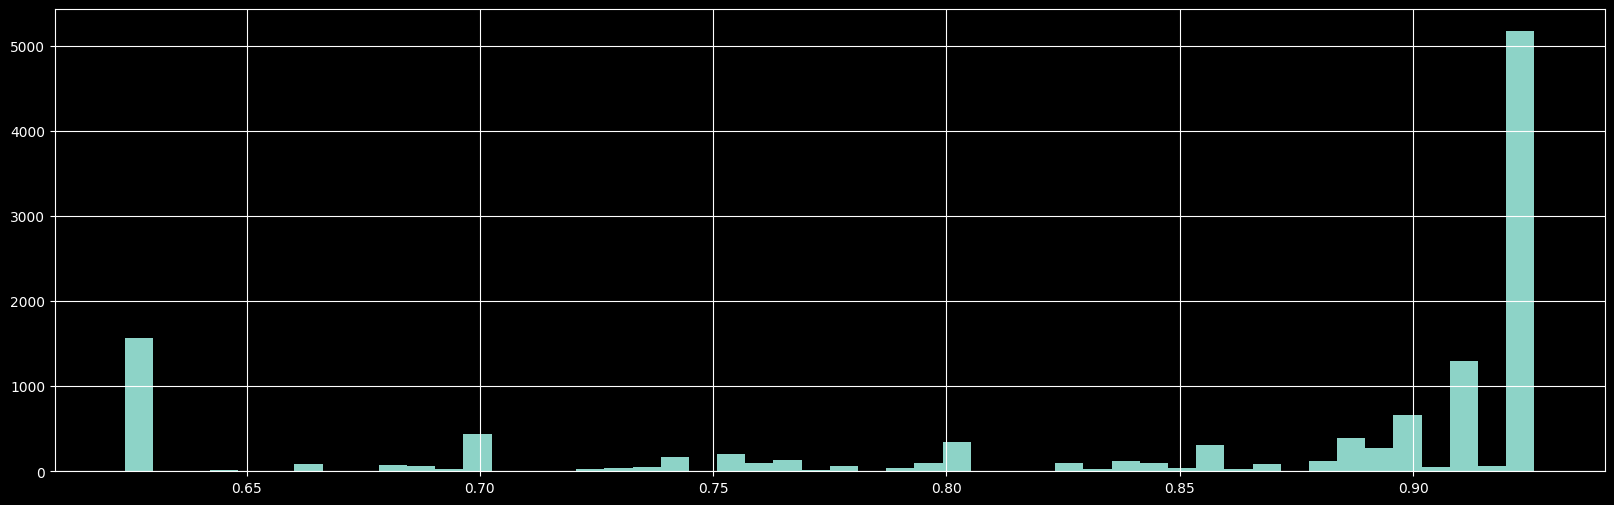

In [55]:
df[(df['gender']=='Male') * (df['city_development_index'].between(q1,q2))]['city_development_index'].hist(bins=50, figsize=(20, 6))

array([[<Axes: title={'center': 'enrollee_id'}>,
        <Axes: title={'center': 'city_development_index'}>],
       [<Axes: title={'center': 'training_hours'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

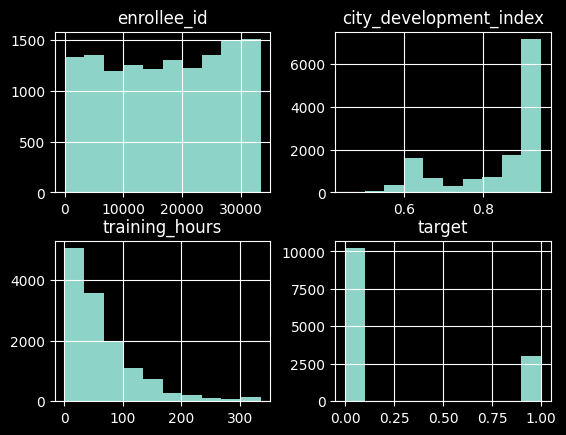

In [65]:
df[df['gender']=='Male'].hist()

<Axes: ylabel='Frequency'>

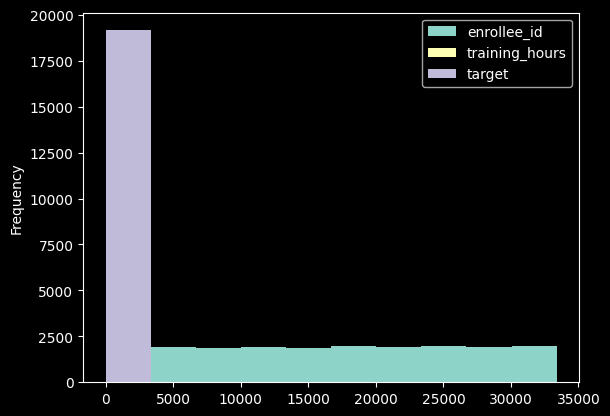

In [77]:
df.plot(kind='hist', x='city_development_index')

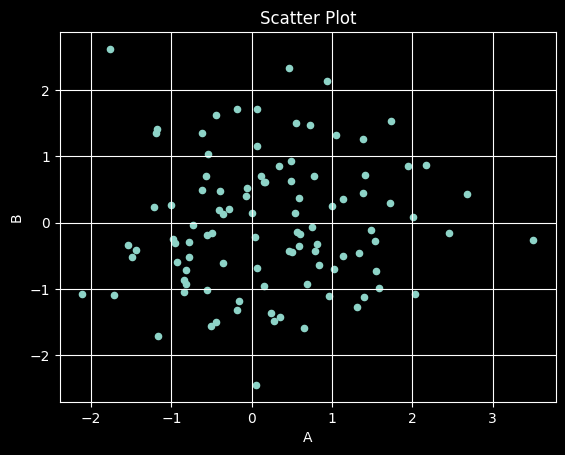

In [145]:
data = {'A': np.random.randn(100), 'B': np.random.randn(100)}

df1 = pd.DataFrame(data)

# Строим график типа 'scatter'
df1.plot(kind='scatter', x='A', y='B', title='Scatter Plot', grid=True, legend=True)

# Отображаем график
plt.show()

In [148]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

<ipython-input-230-853822dc80d8>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['city'],dropna=False)['training_hours', 'city_development_index'].sum().sort_values('training_hours',  ascending=False).head(10).plot(kind='bar')


<Axes: xlabel='city'>

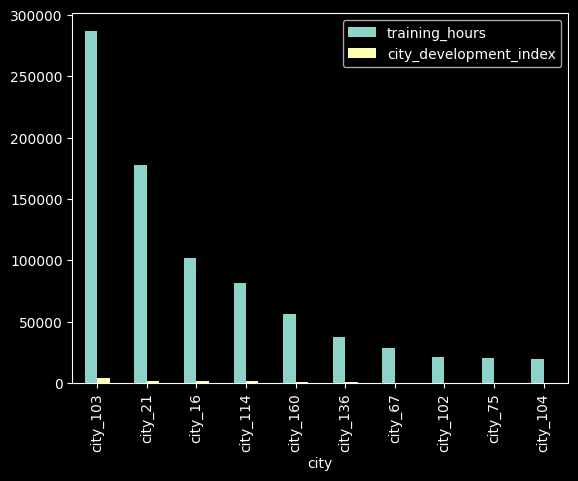

In [230]:
df.groupby(['city'],dropna=False)['training_hours', 'city_development_index'].sum().sort_values('training_hours',  ascending=False).head(10).plot(kind='bar')

<Axes: xlabel='city_development_index_group'>

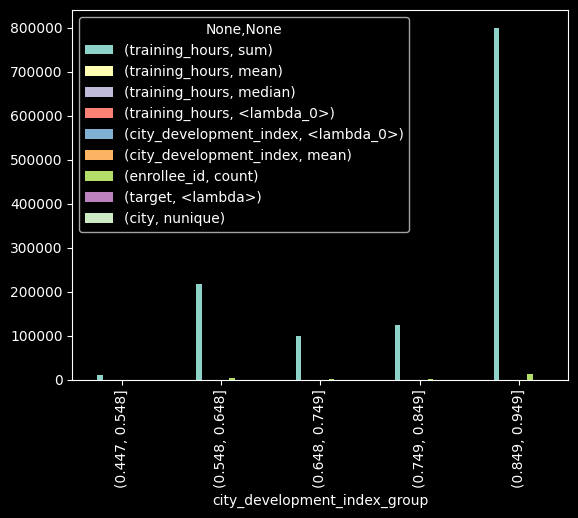

In [314]:
df.groupby(['city_development_index_group'], dropna=False).agg(
                                  {
                                    'training_hours': ['sum', 'mean', 'median', (lambda x: np.percentile(x,25))],
                                    'city_development_index': [(lambda x: np.percentile(x,25)),'mean'],
                                    'enrollee_id': 'count',
                                    'target': (lambda x: np.percentile(x, 25)),
                                    'city': pd.Series.nunique
                                   }
                                  ).sort_values(('city_development_index_group'), ascending=True).plot(kind='bar')